In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [3]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,67.631325,54.709999,32.578758
2014-01-03,67.408478,54.560001,32.504059
2014-01-06,67.031372,57.200001,32.592323
2014-01-07,67.237091,57.919998,32.965771
2014-01-08,66.705688,58.230000,33.087997


In [4]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2020-04-06,126.070000,165.550003,25.049999
2020-04-07,121.989998,168.830002,24.799999
2020-04-08,121.839996,174.279999,25.389999
2020-04-09,121.800003,175.190002,24.900000
2020-04-13,123.790001,171.740005,24.795000


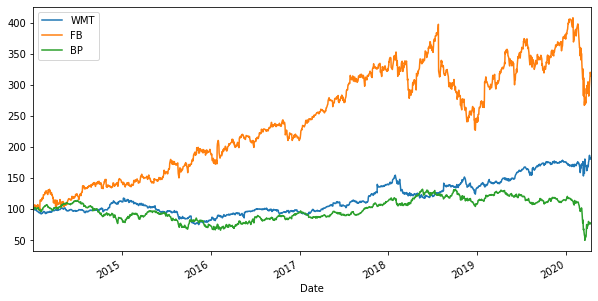

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

WMT    0.095712
FB     0.181117
BP    -0.043226
dtype: float64

In [8]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.043067,0.015716,0.012150
FB,0.015716,0.099399,0.031141
BP,0.012150,0.031141,0.082322


In [9]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.240199,0.204060
FB,0.240199,1.000000,0.344263
BP,0.204060,0.344263,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

3

In [12]:
arr = np.random.random(2)
arr

array([0.04897449, 0.09049734])

In [13]:
arr[0] + arr[1]

0.13947182460593333

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.60892699, 0.23324153, 0.15783148])

In [15]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.09370297554094231

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.032519569060786055

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.1803318304148939

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.05630838206949645,
  -0.02697001746436889,
  0.11095029401453399,
  0.08205872600716206,
  0.06386910281178443,
  0.06953427566901736,
  0.12065569315759425,
  0.0051883013445940245,
  0.09451740112978659,
  0.053951831047829094,
  0.05499459368960481,
  0.11721117917648452,
  0.07553466282654481,
  0.11466392388679798,
  0.11039313662377993,
  0.10959585915820493,
  0.10695272112022594,
  0.06368161123675031,
  0.047682372912117174,
  0.06430999426379841,
  0.12247339679190378,
  0.038528376584280814,
  0.10748651817721996,
  0.12293224036008879,
  0.07101430570815902,
  0.03884466084637347,
  0.09637685407660061,
  0.060157035494179195,
  0.08130904780039624,
  0.0660919281589898,
  0.13260140376168544,
  0.0420624745250195,
  0.07305772551441989,
  0.0735308283672259,
  0.04601389202924217,
  0.1120182873726295,
  0.13657482871513188,
  -0.018842070508760897,
  0.06985195401056755,
  0.06558777359996801,
  0.06611197292828827,
  0.08631497101834099,
  0.11216620069777061,
  0.07

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.07471827,  0.076516  ,  0.09842958,  0.03598078,  0.08742296,
         0.03014304,  0.06100863, -0.0189134 ,  0.03385217,  0.15586253,
         0.0440473 ,  0.11298799,  0.11959762,  0.08546524,  0.05625567,
         0.09352714,  0.12498907,  0.11166017,  0.1484525 ,  0.04377351,
         0.05641835,  0.0646891 ,  0.08803362,  0.05125118,  0.05080736,
         0.06714399,  0.01693709,  0.06864279,  0.07686273,  0.08956479,
         0.12038056,  0.0388687 ,  0.07056182,  0.06790834,  0.05469843,
         0.02961454,  0.10337   ,  0.15119103,  0.02443834,  0.09368973,
         0.06522006,  0.07915695,  0.11935589,  0.11264625,  0.14805391,
         0.06056597,  0.06158839,  0.05106133,  0.0360219 ,  0.09911174,
         0.02294169,  0.07426784,  0.11849923,  0.11377057,  0.09254757,
         0.11666484,  0.07372366,  0.0885773 ,  0.06668897,  0.17052005,
         0.1209134 ,  0.07052181,  0.0030623 ,  0.05636104,  0.03254094,
         0.09540025,  0.08091063,  0.0888182 ,  0.0

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.074718,0.198911
1,0.076516,0.215291
2,0.098430,0.185400
3,0.035981,0.187531
4,0.087423,0.191714


In [23]:
portfolios.tail()

,Return,Volatility
995,0.028004,0.215005
996,0.082638,0.202274
997,0.077021,0.245196
998,0.098383,0.201692
999,0.115185,0.191991


Text(0, 0.5, 'Expected Return')

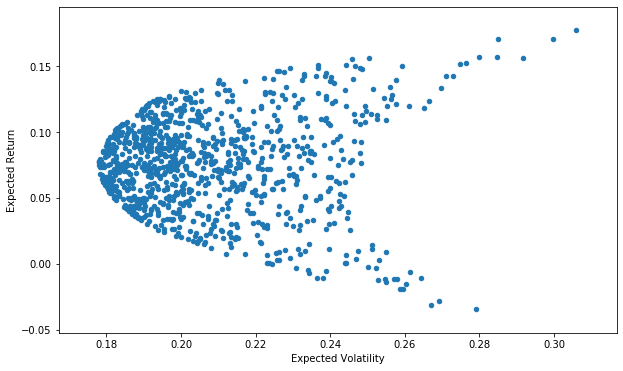

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')